In [2]:
#In this notebook :
#1. Comparing Rw models with ensemble models trained on normalized gene expressions
#2. Checking how adding embedding dimensions affects the model performance
%cd "~/pln-brca-xp/notebooks"
%load_ext autoreload
%autoreload 2

/home/xabush/pln-brca-xp/notebooks


In [3]:
from utils import *

In [4]:
ge_df = pd.read_csv("/var/www/datasets/merged-combat15.csv.xz", index_col="patient_ID")
state_df = pd.read_csv("/var/www/datasets/embedding_vector_state_and_outcome.csv", index_col="patient_ID")
ge_df = ge_df.join(state_df["posOutcome"])

In [5]:
X_train, X_test, y_train, y_test = get_train_test_set(ge_df, "/var/www/datasets/tamox_train_set.txt", "/var/www/datasets/tamox_test_set.txt")
mq_norm = MQNormalizer(n_quantiles=5, subsample=X_train.shape[0])
X_train_q = mq_norm.fit_transform(X_train)
X_train_q

,MAGEA12_overexpr,MAGEA11_overexpr,KLF1_overexpr,ADH7_overexpr,MSH4_overexpr,BIRC3_overexpr,AKR1C4_overexpr,GBX2_overexpr,GCGR_overexpr,SIGLEC9_overexpr,...,ZNF80_underexpr,ZNF83_underexpr,ZNF84_underexpr,ZNF91_underexpr,ZNHIT2_underexpr,ZSCAN2_underexpr,ZXDC_underexpr,ZYX_underexpr,ZZEF1_underexpr,ZZZ3_underexpr
22473,0.755320,0.000000,0.771558,0.000000,0.759975,0.778686,0.770952,0.781519,0.751195,0.750228,...,0.000000,0.788414,0.844033,0.788988,0.804665,0.000000,0.000000,0.000000,0.000000,0.823509
249608,0.774768,0.765566,0.774633,0.000000,0.786826,0.000000,0.759113,0.788563,0.756658,0.761962,...,0.000000,0.000000,0.000000,0.576941,0.000000,0.000000,0.000000,0.790472,0.000000,0.768952
249599,0.790854,0.780173,0.758571,0.685255,0.784460,0.627062,0.000000,0.000000,0.000000,0.759564,...,0.775860,0.000000,0.000000,0.529503,0.831106,0.697827,0.000000,0.631057,0.000000,0.566916
441791,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.750000,0.000000,...,0.000000,0.000000,0.795305,0.522462,0.000000,0.000000,0.000000,0.565844,0.751681,0.000000
249560,0.754638,0.000000,0.753621,0.000000,0.000000,0.000000,0.000000,0.765941,0.765740,0.770269,...,0.000000,0.788114,0.662081,0.776950,0.000000,0.746243,0.000000,0.616661,0.000000,0.841256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22502,0.764962,0.536191,0.774357,0.754878,0.000000,0.529843,0.751707,0.000000,0.000000,0.574780,...,0.750458,0.000000,0.000000,0.000000,0.559906,0.000000,0.000000,0.000000,0.781229,0.000000
441685,0.000000,0.000000,0.776504,0.667331,0.750000,0.589588,0.750000,0.000000,0.000000,0.000000,...,0.000000,0.757876,0.892085,0.812740,0.000000,0.000000,0.000000,0.782415,0.000000,0.000000
441899,0.000000,0.000000,0.000000,0.885443,0.000000,0.000000,0.000000,0.750000,0.750000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.782445
305219,0.000000,0.502497,0.000000,0.000000,0.000000,0.784083,0.000000,0.000000,0.000000,0.503539,...,0.750000,0.000000,0.695661,0.000000,0.757612,0.750000,0.752050,0.000000,0.780811,0.000000


In [6]:
X_test_q = mq_norm.transform(X_test)
X_test_q

,MAGEA12_overexpr,MAGEA11_overexpr,KLF1_overexpr,ADH7_overexpr,MSH4_overexpr,BIRC3_overexpr,AKR1C4_overexpr,GBX2_overexpr,GCGR_overexpr,SIGLEC9_overexpr,...,ZNF80_underexpr,ZNF83_underexpr,ZNF84_underexpr,ZNF91_underexpr,ZNHIT2_underexpr,ZSCAN2_underexpr,ZXDC_underexpr,ZYX_underexpr,ZZEF1_underexpr,ZZZ3_underexpr
249540,0.000000,0.000000,0.000000,0.000000,0.000000,0.712207,0.76379,0.756508,0.00,0.000000,...,0.97893,0.000000,0.787505,0.000000,0.00,0.000000,0.506928,0.000000,0.839701,0.660961
441885,0.757387,1.000000,0.000000,0.837795,0.000000,0.000000,0.00000,0.750000,0.75,0.000000,...,0.00000,0.000000,0.670366,0.000000,0.00,0.000000,0.000000,0.000000,0.689889,0.000000
441672,0.000000,0.000000,0.000000,0.667331,0.750000,0.647551,0.75000,0.000000,0.00,0.000000,...,0.00000,0.541549,0.000000,0.730075,0.00,0.628329,0.519482,0.000000,0.000000,0.759948
441746,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.750000,0.75,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.779612,0.782534,0.000000
305151,0.000000,0.502497,0.000000,0.000000,0.000000,0.636346,0.00000,0.000000,0.00,0.503539,...,0.75000,0.558113,0.763324,0.757755,0.00,0.750000,0.000000,0.000000,0.000000,0.744926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441908,0.000000,0.000000,0.000000,0.577685,0.000000,0.000000,0.00000,0.750000,0.75,0.000000,...,0.00000,0.689546,0.835837,0.000000,0.00,0.000000,0.646032,0.000000,0.000000,0.000000
441675,0.898199,0.000000,0.000000,0.667331,0.750000,0.000000,0.75000,0.000000,0.00,0.818226,...,0.00000,0.761012,0.828643,0.822902,0.00,0.628329,0.000000,0.755952,0.000000,0.782249
441765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.750000,0.75,0.000000,...,0.00000,0.000000,0.506010,0.601826,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
305133,0.000000,0.502497,0.764303,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.503539,...,0.75000,0.786319,0.754317,0.770470,0.00,0.000000,0.000000,0.000000,0.516633,0.791179


In [7]:
from pymrmre import mrmr

# solutions = mrmr.mrmr_ensemble(features=X_train_norm, targets=y_train.to_frame(), solution_length=100, solution_count=1)
# feats_100 = solutions[0][0]

feats_100 = load_features("/var/www/datasets/feats_100_mrmr_tamoxifen_qnormalized.txt")

In [8]:
params_q_auc, clf_q_auc, cv_score_q_auc, test_scores_q_auc = evaluate_ge((X_train_q, X_test_q, y_train, y_test), split=False, feats=feats_100)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[13:02:19] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:02:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 3.54 seconds.
Best Score: 85.065%
{'subsample': 0.6, 'scale_pos_weight': 0.7, 'n_estimators': 150, 'min_child_weight': 1, 'max_depth': 3, 'max_delta_step': 4, 'learning_rate': 0.05, 'gamma': 2, 'colsample_bytree': 0.8}
[13:02:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    3.3s finished


In [9]:
params_q_ap, clf_q_ap, cv_score_q_ap, test_scores_q_ap = evaluate_ge((X_train_q, X_test_q, y_train, y_test), split=False, feats=feats_100, rand_scoring=average_precision_0)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[13:02:38] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:02:38] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 2.93 seconds.
Best Score: 25.115%
{'subsample': 0.6, 'scale_pos_weight': 0.1, 'n_estimators': 80, 'min_child_weight': 3, 'max_depth': 5, 'max_delta_step': 3, 'learning_rate': 0.07, 'gamma': 2, 'colsample_bytree': 1.0}
[13:02:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    2.8s finished


In [10]:
params_q_acc, clf_q_acc, cv_score_q_acc, test_scores_q_acc = evaluate_ge((X_train_q, X_test_q, y_train, y_test), split=False, feats=feats_100, rand_scoring="balanced_accuracy")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[13:02:48] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:02:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 2.4 seconds.
Best Score: 74.027%
{'subsample': 0.6, 'scale_pos_weight': 0.3, 'n_estimators': 120, 'min_child_weight': 2, 'max_depth': 4, 'max_delta_step': 4, 'learning_rate': 0.02, 'gamma': 1.5, 'colsample_bytree': 0.6}
[13:03:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric use

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 125 | elapsed:    1.7s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    2.2s finished


In [11]:
params_q_spec, clf_q_spec, cv_score_q_spec, test_scores_q_spec = evaluate_ge((X_train_q, X_test_q, y_train, y_test), split=False, feats=feats_100, rand_scoring=spec_score)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[13:03:07] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:03:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 2.46 seconds.
Best Score: 90.000%
{'subsample': 0.8, 'scale_pos_weight': 0.1, 'n_estimators': 150, 'min_child_weight': 2, 'max_depth': 5, 'max_delta_step': 2, 'learning_rate': 0.03, 'gamma': 1, 'colsample_bytree': 0.6}
[13:03:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 125 | elapsed:    1.7s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    2.2s finished


In [13]:
#Embdedding vectors

train_emb_df = pd.read_csv("/var/www/datasets/embedding-vectors/tamoxifen_group/v2/qnorm/property_vector_ge_TRAIN_2021-03-08.csv", sep="\t", index_col="patient_ID")
train_emb_outcome_df = train_emb_df.join(ge_df["posOutcome"])
X_train_emb_df, y_train_emb_df = train_emb_outcome_df.drop(["posOutcome"], axis=1), train_emb_outcome_df["posOutcome"]
X_train_emb_df, y_train_emb_df = X_train_emb_df.loc[y_train.index,:], y_train_emb_df.loc[y_train.index]
X_train_emb_df

,0,1,2,3,4,5,6,7,8,9,...,438,439,440,441,442,443,444,445,446,447
22473,0.063896,0.013294,0.171777,0.245809,0.032234,-0.020819,-0.205461,-0.196336,0.052045,0.031342,...,0.001416,-0.007173,0.006335,-0.000321,-0.002084,-0.000864,-0.002995,0.000110,-0.005565,0.000059
249608,-0.172764,0.116518,-0.225723,0.152590,-0.014132,0.041132,0.005576,-0.179222,-0.159315,0.103187,...,-0.010902,-0.005290,0.002900,0.010003,0.009255,-0.007660,-0.000353,-0.000279,0.000919,0.000043
249599,-0.043700,-0.070290,0.108893,0.339546,0.093606,0.013639,0.265824,0.208166,-0.060417,0.096419,...,0.020599,0.011911,0.002734,-0.027659,-0.007041,0.007687,0.018473,-0.009530,0.001870,-0.000202
441791,0.432583,-0.008400,-0.092548,-0.111969,0.048358,-0.020427,0.103190,0.013059,-0.025715,-0.097285,...,-0.002611,0.004553,0.000427,0.008633,0.003371,-0.001384,0.000373,-0.000805,-0.004228,-0.000004
249560,-0.043048,-0.089412,0.033921,0.278360,0.115164,0.026979,-0.061757,0.169515,0.057925,0.070018,...,-0.009108,0.004644,0.015050,-0.000145,0.008967,-0.005452,0.003955,0.000849,-0.005292,-0.000142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22502,-0.066573,0.064853,-0.005084,0.158274,-0.074149,-0.208164,-0.026904,0.031100,-0.149082,-0.036610,...,-0.004083,-0.001883,-0.001951,0.001440,0.005866,-0.001231,0.004702,-0.003564,0.000383,0.000023
441685,-0.153714,0.305324,0.258910,-0.083596,0.062455,-0.109677,0.108631,-0.164575,-0.009476,0.083089,...,-0.007041,-0.000266,0.006136,-0.008585,0.002386,0.006546,-0.006993,0.008256,-0.002627,0.000041
441899,0.354634,-0.026529,0.032135,-0.093747,0.156528,-0.007012,0.080485,-0.003633,0.105135,-0.103137,...,0.003197,0.001138,-0.003092,-0.006087,-0.003027,0.002722,-0.000938,-0.004664,0.000667,0.000058
305219,-0.322182,-0.354117,-0.129829,-0.128455,-0.114021,0.030881,0.019140,0.022559,0.114542,-0.121152,...,0.030119,-0.007370,0.009612,-0.022362,0.016004,-0.008694,0.007034,0.001593,0.006395,0.000006


In [14]:
test_emb_df = pd.read_csv("/var/www/datasets/embedding-vectors/tamoxifen_group/v2/qnorm/property_vector_ge_TEST_2021-03-08.csv", sep="\t", index_col="patient_ID")
test_emb_outcome_df = test_emb_df.join(ge_df["posOutcome"])
X_test_emb_df, y_test_emb_df = test_emb_outcome_df.drop(["posOutcome"], axis=1), test_emb_outcome_df["posOutcome"]
X_test_emb_df, y_test_emb_df = X_test_emb_df.loc[y_test.index,:], y_test_emb_df.loc[y_test.index]
X_test_emb_df

,0,1,2,3,4,5,6,7,8,9,...,438,439,440,441,442,443,444,445,446,447
249540,-0.027689,-0.042820,0.159528,0.057460,-0.014304,0.050602,-0.112625,-0.068291,-0.045663,-0.030843,...,0.001071,0.000671,-0.005138,-0.000911,0.021101,0.015446,0.002778,-0.008891,-0.006039,-0.003812
441885,0.099257,0.057199,0.013295,0.044155,0.095288,-0.088536,0.027521,-0.018736,0.036637,0.012474,...,0.000769,0.006205,-0.007285,0.016754,-0.016081,-0.023247,-0.016402,0.002901,-0.000900,0.012612
441672,-0.068431,0.009447,0.112748,-0.001753,-0.054333,0.055137,0.037015,-0.100175,-0.032176,-0.005010,...,0.007060,-0.003076,0.005653,-0.006312,0.006498,0.009857,-0.003939,-0.011954,0.005797,-0.003303
441746,0.161040,-0.022776,0.015928,-0.023490,-0.055635,-0.031633,0.004278,0.009844,0.006822,0.000152,...,0.006896,0.009153,-0.006089,0.002366,-0.012406,-0.010608,-0.003158,-0.001409,-0.004598,0.002265
305151,-0.147054,-0.072686,-0.099012,0.033124,0.009270,-0.005599,-0.007192,0.014272,-0.030038,-0.098550,...,-0.001013,0.001790,0.006041,0.000399,-0.008423,0.002215,0.018272,-0.000541,0.012906,0.012760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441908,0.155693,0.003604,0.023790,0.075330,0.001363,0.000553,-0.016563,-0.101638,-0.004785,-0.067200,...,-0.007475,-0.003851,-0.008995,-0.010092,-0.002335,0.000305,-0.000284,0.014110,0.003227,0.010424
441675,-0.085074,0.051368,0.191087,-0.016821,-0.038654,0.004715,0.039959,-0.086546,-0.004682,0.025131,...,-0.003369,-0.008332,-0.009770,-0.005231,0.011264,-0.007991,0.001054,-0.013722,0.014135,-0.005062
441765,0.137226,0.009944,-0.009861,-0.075752,0.009191,-0.048483,0.005086,0.018746,0.001558,0.024779,...,-0.007677,0.008101,0.001664,-0.014192,-0.005361,0.006132,-0.001034,0.006070,-0.001090,-0.006059
305133,-0.109356,-0.093404,-0.015230,0.048723,0.067065,-0.013202,0.007349,-0.023484,0.031279,-0.109712,...,-0.008576,0.004588,0.007641,0.010140,-0.004743,0.011571,0.024445,-0.007358,0.014514,0.006483


In [15]:
params_emb_auc, clf_emb_auc, cv_scores_emb_auc, test_scores_emb_auc = evaluate_ge((X_train_emb_df, X_test_emb_df, y_train_emb_df, y_test_emb_df),split=False)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[13:07:00] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:07:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 13.74 seconds.
Best Score: 77.985%
{'subsample': 0.8, 'scale_pos_weight': 0.5, 'n_estimators': 150, 'min_child_weight': 4, 'max_depth': 4, 'max_delta_step': 1, 'learning_rate': 0.03, 'gamma': 1.5, 'colsample_bytree': 0.8}
[13:07:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric u

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   12.0s finished


In [16]:
params_emb_ap, clf_emb_ap, cv_scores_emb_ap, test_scores_emb_ap = evaluate_ge((X_train_emb_df, X_test_emb_df, y_train_emb_df, y_test_emb_df), split=False, rand_scoring=average_precision_0)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[13:07:34] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:07:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 12.68 seconds.
Best Score: 25.448%
{'subsample': 0.6, 'scale_pos_weight': 0.1, 'n_estimators': 80, 'min_child_weight': 3, 'max_depth': 5, 'max_delta_step': 3, 'learning_rate': 0.07, 'gamma': 2, 'colsample_bytree': 1.0}
[13:07:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   12.0s finished


In [17]:
params_emb_spec, clf_emb_spec, cv_scores_emb_spec, test_scores_emb_spec = evaluate_ge((X_train_emb_df, X_test_emb_df, y_train_emb_df, y_test_emb_df), split=False, rand_scoring=spec_score)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[13:07:56] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:07:56] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 13.02 seconds.
Best Score: 88.333%
{'subsample': 0.6, 'scale_pos_weight': 0.1, 'n_estimators': 80, 'min_child_weight': 3, 'max_depth': 5, 'max_delta_step': 3, 'learning_rate': 0.07, 'gamma': 2, 'colsample_bytree': 1.0}
[13:08:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   12.3s finished


In [50]:
params_emb_acc, clf_emb_acc, cv_scores_emb_acc, test_scores_emb_acc = evaluate_ge((X_train_emb_df, X_test_emb_df, y_train_emb_df, y_test_emb_df), split=False, rand_scoring="balanced_accuracy")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[13:42:38] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:42:38] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 13.54 seconds.
Best Score: 72.898%
{'subsample': 0.6, 'scale_pos_weight': 0.3, 'n_estimators': 50, 'min_child_weight': 1, 'max_depth': 5, 'max_delta_step': 4, 'learning_rate': 0.07, 'gamma': 1.5, 'colsample_bytree': 0.6}
[13:42:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric us

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   12.9s finished


In [19]:
print_score_comparison_v2(cv_score_q_auc, cv_scores_emb_auc, test_scores_q_auc, test_scores_emb_auc, header_1="Raw Normalized", header_2="Embedding", opt="AUC")

	Validation set - AUC

			Raw Normalized				Embedding
		-------------------------------------------------------
balanced_accuracy:	71.24%				69.15%

recall_0:		49.17%				45.00%

precision_0:		72.35%				72.07%

recall_1:		93.31%				93.30%

precision_1:		83.51%				82.39%

auc:			85.06%				77.98%



	Test set - AUC

			Raw Normalized				Embedding
		-------------------------------------------------------
balanced_accuracy:	60.13%				52.71%

recall_0:		29.41%				11.76%

precision_0:		53.57%				40.00%

recall_1:		90.85%				93.66%

precision_1:		78.18%				74.72%

auc:			73.06%				64.93%



In [20]:
print_score_comparison_v2(cv_score_q_ap, cv_scores_emb_ap, test_scores_q_ap, test_scores_emb_ap, header_1="Raw Normalized", header_2="Embedding", opt="AP Opt")

	Validation set - AP Opt

			Raw Normalized				Embedding
		-------------------------------------------------------
balanced_accuracy:	59.10%				56.96%

recall_0:		87.50%				88.33%

precision_0:		31.51%				30.46%

recall_1:		30.71%				25.58%

precision_1:		87.36%				84.65%

auc:			77.96%				74.25%



	Test set - AP Opt

			Raw Normalized				Embedding
		-------------------------------------------------------
balanced_accuracy:	64.11%				50.93%

recall_0:		90.20%				94.12%

precision_0:		34.33%				26.82%

recall_1:		38.03%				7.75%

precision_1:		91.53%				78.57%

auc:			73.42%				62.76%



In [21]:
print_score_comparison_v2(cv_score_q_spec, cv_scores_emb_spec, test_scores_q_spec, test_scores_emb_spec, header_1="Raw Normalized", header_2="Embedding", opt="Spec Opt")

	Validation set - Spec Opt

			Raw Normalized				Embedding
		-------------------------------------------------------
balanced_accuracy:	70.38%				56.96%

recall_0:		90.00%				88.33%

precision_0:		40.13%				30.46%

recall_1:		50.76%				25.58%

precision_1:		93.34%				84.65%

auc:			81.58%				74.25%



	Test set - Spec Opt

			Raw Normalized				Embedding
		-------------------------------------------------------
balanced_accuracy:	67.79%				50.93%

recall_0:		86.27%				94.12%

precision_0:		37.93%				26.82%

recall_1:		49.30%				7.75%

precision_1:		90.91%				78.57%

auc:			75.45%				62.76%



In [22]:
print_score_comparison_v2(cv_score_q_acc, cv_scores_emb_acc, test_scores_q_acc, test_scores_emb_acc, header_1="Raw Normalized", header_2="Embedding", opt="Acc Opt")

	Validation set - Acc Opt

			Raw Normalized				Embedding
		-------------------------------------------------------
balanced_accuracy:	74.03%				72.90%

recall_0:		64.17%				59.17%

precision_0:		59.12%				63.40%

recall_1:		83.89%				86.63%

precision_1:		86.65%				85.41%

auc:			82.76%				77.73%



	Test set - Acc Opt

			Raw Normalized				Embedding
		-------------------------------------------------------
balanced_accuracy:	68.02%				64.65%

recall_0:		52.94%				49.02%

precision_0:		52.94%				47.17%

recall_1:		83.10%				80.28%

precision_1:		83.10%				81.43%

auc:			74.91%				65.34%



In [23]:
train_emb_cl_df = pd.read_csv("/var/www/datasets/embedding-vectors/tamoxifen_group/v2/qnorm/property_vector_ge_cl_TRAIN_2021-03-09.csv", sep="\t", index_col="patient_ID")
train_emb_cl_outcome_df = train_emb_cl_df.join(ge_df["posOutcome"])
X_train_emb_cl_df, y_train_emb_cl_df = train_emb_cl_outcome_df.drop(["posOutcome"], axis=1), train_emb_cl_outcome_df["posOutcome"]
X_train_emb_cl_df, y_train_emb_cl_df = X_train_emb_cl_df.loc[y_train.index,:], y_train_emb_cl_df.loc[y_train.index]

In [24]:
test_emb_cl_df = pd.read_csv("/var/www/datasets/embedding-vectors/tamoxifen_group/v2/qnorm/property_vector_ge_cl_TEST_2021-03-09.csv", sep="\t", index_col="patient_ID")
test_emb_cl_outcome_df = test_emb_cl_df.join(ge_df["posOutcome"])
X_test_emb_cl_df, y_test_emb_cl_df = test_emb_cl_outcome_df.drop(["posOutcome"], axis=1), test_emb_cl_outcome_df["posOutcome"]
X_test_emb_cl_df, y_test_emb_cl_df = X_test_emb_cl_df.loc[y_test.index,:], y_test_emb_cl_df.loc[y_test.index]

In [25]:
params_emb_cl_auc, clf_emb_cl_auc, cv_scores_emb_cl_auc, test_scores_emb_cl_auc = evaluate_ge((X_train_emb_cl_df, X_test_emb_cl_df, y_train_emb_cl_df, y_test_emb_cl_df),split=False)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[13:10:35] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:10:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 13.97 seconds.
Best Score: 81.519%
{'subsample': 1.0, 'scale_pos_weight': 0.7, 'n_estimators': 150, 'min_child_weight': 4, 'max_depth': 3, 'max_delta_step': 3, 'learning_rate': 0.02, 'gamma': 1, 'colsample_bytree': 0.8}
[13:10:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric use

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   12.2s finished


In [ ]:
params_emb_cl_ap, clf_emb_cl_ap, cv_scores_emb_cl_ap, test_scores_emb_cl_ap = evaluate_ge((X_train_emb_cl_df, X_test_emb_cl_df, y_train_emb_cl_df, y_test_emb_cl_df), split=False, rand_scoring=average_precision_0)

In [27]:
params_emb_cl_spec, clf_emb_cl_spec, cv_scores_emb_cl_spec, test_scores_emb_cl_spec = evaluate_ge((X_train_emb_cl_df, X_test_emb_cl_df, y_train_emb_cl_df, y_test_emb_cl_df), split=False, rand_scoring=spec_score)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[13:11:28] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:11:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 12.94 seconds.
Best Score: 88.333%
{'subsample': 0.6, 'scale_pos_weight': 0.1, 'n_estimators': 80, 'min_child_weight': 3, 'max_depth': 5, 'max_delta_step': 3, 'learning_rate': 0.07, 'gamma': 2, 'colsample_bytree': 1.0}
[13:11:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   12.2s finished


In [28]:
params_emb_cl_acc, clf_emb_cl_acc, cv_scores_emb_cl_acc, test_scores_emb_cl_acc = evaluate_ge((X_train_emb_cl_df, X_test_emb_cl_df, y_train_emb_cl_df, y_test_emb_cl_df), split=False, rand_scoring="balanced_accuracy")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[13:11:49] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:11:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 14.17 seconds.
Best Score: 74.790%
{'subsample': 1.0, 'scale_pos_weight': 0.3, 'n_estimators': 150, 'min_child_weight': 3, 'max_depth': 4, 'max_delta_step': 3, 'learning_rate': 0.01, 'gamma': 1, 'colsample_bytree': 0.6}
[13:12:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric use

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   12.5s finished


In [29]:
print_score_comparison_v2(cv_scores_emb_auc, cv_scores_emb_cl_auc, test_scores_emb_auc, test_scores_emb_cl_auc, header_1="Without CL", header_2="With CL", opt="AUC Opt")

	Validation set - AUC Opt

			Without CL				With CL
		-------------------------------------------------------
balanced_accuracy:	69.15%				68.96%

recall_0:		45.00%				45.83%

precision_0:		72.07%				68.81%

recall_1:		93.30%				92.09%

precision_1:		82.39%				82.41%

auc:			77.98%				81.52%



	Test set - AUC Opt

			Without CL				With CL
		-------------------------------------------------------
balanced_accuracy:	52.71%				55.65%

recall_0:		11.76%				17.65%

precision_0:		40.00%				50.00%

recall_1:		93.66%				93.66%

precision_1:		74.72%				76.00%

auc:			64.93%				57.00%



In [30]:
print_score_comparison_v2(cv_scores_emb_ap, cv_scores_emb_cl_ap, test_scores_emb_ap, test_scores_emb_cl_ap, header_1="Without CL", header_2="With CL", opt="AP Opt")

	Validation set - AP Opt

			Without CL				With CL
		-------------------------------------------------------
balanced_accuracy:	56.96%				64.38%

recall_0:		88.33%				88.33%

precision_0:		30.46%				35.15%

recall_1:		25.58%				40.42%

precision_1:		84.65%				90.39%

auc:			74.25%				78.33%



	Test set - AP Opt

			Without CL				With CL
		-------------------------------------------------------
balanced_accuracy:	50.93%				51.59%

recall_0:		94.12%				86.27%

precision_0:		26.82%				27.16%

recall_1:		7.75%				16.90%

precision_1:		78.57%				77.42%

auc:			62.76%				55.14%



In [51]:
print_score_comparison_v2(cv_scores_emb_acc, cv_scores_emb_cl_acc, test_scores_emb_acc, test_scores_emb_cl_acc, header_1="Without CL", header_2="With CL", opt="Acc Opt")

	Validation set - Acc Opt

			Without CL				With CL
		-------------------------------------------------------
balanced_accuracy:	72.90%				74.79%

recall_0:		59.17%				60.83%

precision_0:		63.40%				67.37%

recall_1:		86.63%				88.75%

precision_1:		85.41%				86.24%

auc:			77.73%				78.33%



	Test set - Acc Opt

			Without CL				With CL
		-------------------------------------------------------
balanced_accuracy:	64.65%				55.88%

recall_0:		49.02%				39.22%

precision_0:		47.17%				33.90%

recall_1:		80.28%				72.54%

precision_1:		81.43%				76.87%

auc:			65.34%				59.57%



In [33]:
#CL + PLN
train_emb_pln_df = pd.read_csv("/var/www/datasets/embedding-vectors/tamoxifen_group/v2/qnorm/property_vector_ge_pln_TRAIN_2021-03-16.csv", sep="\t", index_col="patient_ID")
train_emb_pln_outcome_df = train_emb_pln_df.join(ge_df["posOutcome"])
X_train_emb_pln_df, y_train_emb_pln_df = train_emb_pln_outcome_df.drop(["posOutcome"], axis=1), train_emb_pln_outcome_df["posOutcome"]
X_train_emb_pln_df, y_train_emb_pln_df = X_train_emb_pln_df.loc[y_train.index,:], y_train_emb_pln_df.loc[y_train.index]

In [32]:
test_emb_pln_df = pd.read_csv("/var/www/datasets/embedding-vectors/tamoxifen_group/v2/qnorm/property_vector_ge_pln_TEST_2021-03-16.csv", sep="\t", index_col="patient_ID")
test_emb_pln_outcome_df = test_emb_pln_df.join(ge_df["posOutcome"])
X_test_emb_pln_df, y_test_emb_pln_df = test_emb_pln_outcome_df.drop(["posOutcome"], axis=1), test_emb_pln_outcome_df["posOutcome"]
X_test_emb_pln_df, y_test_emb_pln_df = X_test_emb_pln_df.loc[y_test.index,:], y_test_emb_pln_df.loc[y_test.index]

In [34]:
params_emb_pln_auc, clf_emb_pln_auc, cv_scores_emb_pln_auc, test_scores_emb_pln_auc = evaluate_ge((X_train_emb_pln_df, X_test_emb_pln_df, y_train_emb_pln_df, y_test_emb_pln_df),split=False)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[13:16:40] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:16:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 14.9 seconds.
Best Score: 77.936%
{'subsample': 0.6, 'scale_pos_weight': 0.5, 'n_estimators': 120, 'min_child_weight': 1, 'max_depth': 6, 'max_delta_step': 3, 'learning_rate': 0.05, 'gamma': 0.5, 'colsample_bytree': 0.8}
[13:17:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric us

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   13.1s finished


In [35]:
params_emb_pln_ap, clf_emb_pln_ap, cv_scores_emb_pln_ap, test_scores_emb_pln_ap = evaluate_ge((X_train_emb_pln_df, X_test_emb_pln_df, y_train_emb_pln_df, y_test_emb_pln_df), split=False, rand_scoring=average_precision_0)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[13:17:19] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:17:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 13.63 seconds.
Best Score: 25.288%
{'subsample': 0.6, 'scale_pos_weight': 0.1, 'n_estimators': 80, 'min_child_weight': 3, 'max_depth': 5, 'max_delta_step': 3, 'learning_rate': 0.07, 'gamma': 2, 'colsample_bytree': 1.0}
[13:17:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   12.9s finished


In [36]:
params_emb_pln_spec, clf_emb_pln_spec, cv_scores_emb_pln_spec, test_scores_emb_pln_spec = evaluate_ge((X_train_emb_pln_df, X_test_emb_pln_df, y_train_emb_pln_df, y_test_emb_pln_df), split=False, rand_scoring=spec_score)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[13:17:40] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:17:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 12.78 seconds.
Best Score: 88.333%
{'subsample': 0.6, 'scale_pos_weight': 0.1, 'n_estimators': 80, 'min_child_weight': 3, 'max_depth': 5, 'max_delta_step': 3, 'learning_rate': 0.07, 'gamma': 2, 'colsample_bytree': 1.0}
[13:17:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   12.0s finished


In [37]:
params_emb_pln_acc, clf_emb_pln_acc, cv_scores_emb_pln_acc, test_scores_emb_pln_acc = evaluate_ge((X_train_emb_pln_df, X_test_emb_pln_df, y_train_emb_pln_df, y_test_emb_pln_df), split=False, rand_scoring="balanced_accuracy")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[13:18:30] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:18:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 12.84 seconds.
Best Score: 71.411%
{'subsample': 1.0, 'scale_pos_weight': 0.3, 'n_estimators': 20, 'min_child_weight': 4, 'max_depth': 6, 'max_delta_step': 4, 'learning_rate': 0.05, 'gamma': 1.5, 'colsample_bytree': 0.6}
[13:18:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric us

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   12.5s finished


In [38]:
#Comparing with and without PLN model performance on embedded vectors
print_score_comparison_v2(cv_scores_emb_auc, cv_scores_emb_pln_auc, test_scores_emb_auc, test_scores_emb_pln_auc, header_1="Without PLN", header_2="With PLN", opt="AUC Opt")

	Validation set - AUC Opt

			Without PLN				With PLN
		-------------------------------------------------------
balanced_accuracy:	69.15%				68.13%

recall_0:		45.00%				40.83%

precision_0:		72.07%				79.04%

recall_1:		93.30%				95.43%

precision_1:		82.39%				81.64%

auc:			77.98%				77.94%



	Test set - AUC Opt

			Without PLN				With PLN
		-------------------------------------------------------
balanced_accuracy:	52.71%				65.66%

recall_0:		11.76%				41.18%

precision_0:		40.00%				60.00%

recall_1:		93.66%				90.14%

precision_1:		74.72%				81.01%

auc:			64.93%				77.20%



In [39]:
print_score_comparison_v2(cv_scores_emb_ap, cv_scores_emb_pln_ap, test_scores_emb_ap, test_scores_emb_pln_ap, header_1="Without PLN", header_2="With PLN", opt="AP Opt")

	Validation set - AP Opt

			Without PLN				With PLN
		-------------------------------------------------------
balanced_accuracy:	56.96%				58.48%

recall_0:		88.33%				88.33%

precision_0:		30.46%				31.39%

recall_1:		25.58%				28.62%

precision_1:		84.65%				86.23%

auc:			74.25%				75.29%



	Test set - AP Opt

			Without PLN				With PLN
		-------------------------------------------------------
balanced_accuracy:	50.93%				62.43%

recall_0:		94.12%				88.24%

precision_0:		26.82%				33.33%

recall_1:		7.75%				36.62%

precision_1:		78.57%				89.66%

auc:			62.76%				74.98%



In [52]:
print_score_comparison_v2(cv_scores_emb_acc, cv_scores_emb_pln_acc, test_scores_emb_acc, test_scores_emb_pln_acc, header_1="Without PLN", header_2="With PLN", opt="Acc Opt")

	Validation set - Acc Opt

			Without PLN				With PLN
		-------------------------------------------------------
balanced_accuracy:	72.90%				71.41%

recall_0:		59.17%				65.00%

precision_0:		63.40%				52.03%

recall_1:		86.63%				77.82%

precision_1:		85.41%				85.97%

auc:			77.73%				76.44%



	Test set - Acc Opt

			Without PLN				With PLN
		-------------------------------------------------------
balanced_accuracy:	64.65%				66.61%

recall_0:		49.02%				52.94%

precision_0:		47.17%				49.09%

recall_1:		80.28%				80.28%

precision_1:		81.43%				82.61%

auc:			65.34%				74.25%



In [41]:
#Comparing with CL and with PLN model performance on embedded vectors
print_score_comparison_v2(cv_scores_emb_cl_auc, cv_scores_emb_pln_auc, test_scores_emb_cl_auc, test_scores_emb_pln_auc, header_1="With CL", header_2="With PLN", opt="AUC Opt")

	Validation set - AUC Opt

			With CL				With PLN
		-------------------------------------------------------
balanced_accuracy:	68.96%				68.13%

recall_0:		45.83%				40.83%

precision_0:		68.81%				79.04%

recall_1:		92.09%				95.43%

precision_1:		82.41%				81.64%

auc:			81.52%				77.94%



	Test set - AUC Opt

			With CL				With PLN
		-------------------------------------------------------
balanced_accuracy:	55.65%				65.66%

recall_0:		17.65%				41.18%

precision_0:		50.00%				60.00%

recall_1:		93.66%				90.14%

precision_1:		76.00%				81.01%

auc:			57.00%				77.20%



In [42]:
print_score_comparison_v2(cv_scores_emb_cl_ap, cv_scores_emb_pln_ap, test_scores_emb_cl_ap, test_scores_emb_pln_ap, header_1="With CL", header_2="With PLN", opt="AP Opt")

	Validation set - AP Opt

			With CL				With PLN
		-------------------------------------------------------
balanced_accuracy:	64.38%				58.48%

recall_0:		88.33%				88.33%

precision_0:		35.15%				31.39%

recall_1:		40.42%				28.62%

precision_1:		90.39%				86.23%

auc:			78.33%				75.29%



	Test set - AP Opt

			With CL				With PLN
		-------------------------------------------------------
balanced_accuracy:	51.59%				62.43%

recall_0:		86.27%				88.24%

precision_0:		27.16%				33.33%

recall_1:		16.90%				36.62%

precision_1:		77.42%				89.66%

auc:			55.14%				74.98%



In [48]:
print_score_comparison_v2(cv_scores_emb_cl_acc, cv_scores_emb_pln_acc, test_scores_emb_cl_acc, test_scores_emb_pln_acc, header_1="With CL", header_2="With PLN", opt="Acc Opt")

	Validation set - Acc Opt

			With CL				With PLN
		-------------------------------------------------------
balanced_accuracy:	74.79%				71.41%

recall_0:		60.83%				65.00%

precision_0:		67.37%				52.03%

recall_1:		88.75%				77.82%

precision_1:		86.24%				85.97%

auc:			78.33%				76.44%



	Test set - Acc Opt

			With CL				With PLN
		-------------------------------------------------------
balanced_accuracy:	55.88%				66.61%

recall_0:		39.22%				52.94%

precision_0:		33.90%				49.09%

recall_1:		72.54%				80.28%

precision_1:		76.87%				82.61%

auc:			59.57%				74.25%



In [44]:
#Comparing with Raw and with PLN model performance on embedded vectors
print_score_comparison_v2(cv_score_q_auc, cv_scores_emb_pln_auc, test_scores_q_auc, test_scores_emb_pln_auc, header_1="Raw", header_2="With PLN", opt="AUC Opt")

	Validation set - AUC Opt

			Raw				With PLN
		-------------------------------------------------------
balanced_accuracy:	71.24%				68.13%

recall_0:		49.17%				40.83%

precision_0:		72.35%				79.04%

recall_1:		93.31%				95.43%

precision_1:		83.51%				81.64%

auc:			85.06%				77.94%



	Test set - AUC Opt

			Raw				With PLN
		-------------------------------------------------------
balanced_accuracy:	60.13%				65.66%

recall_0:		29.41%				41.18%

precision_0:		53.57%				60.00%

recall_1:		90.85%				90.14%

precision_1:		78.18%				81.01%

auc:			73.06%				77.20%



In [45]:
print_score_comparison_v2(cv_score_q_ap, cv_scores_emb_pln_ap, test_scores_q_ap, test_scores_emb_pln_ap, header_1="Raw", header_2="With PLN", opt="AP Opt")

	Validation set - AP Opt

			Raw				With PLN
		-------------------------------------------------------
balanced_accuracy:	59.10%				58.48%

recall_0:		87.50%				88.33%

precision_0:		31.51%				31.39%

recall_1:		30.71%				28.62%

precision_1:		87.36%				86.23%

auc:			77.96%				75.29%



	Test set - AP Opt

			Raw				With PLN
		-------------------------------------------------------
balanced_accuracy:	64.11%				62.43%

recall_0:		90.20%				88.24%

precision_0:		34.33%				33.33%

recall_1:		38.03%				36.62%

precision_1:		91.53%				89.66%

auc:			73.42%				74.98%



In [53]:
print_score_comparison_v2(cv_score_q_acc, cv_scores_emb_pln_acc, test_scores_q_acc, test_scores_emb_pln_acc, header_1="Raw", header_2="With PLN", opt="Acc Opt")

	Validation set - Acc Opt

			Raw				With PLN
		-------------------------------------------------------
balanced_accuracy:	74.03%				71.41%

recall_0:		64.17%				65.00%

precision_0:		59.12%				52.03%

recall_1:		83.89%				77.82%

precision_1:		86.65%				85.97%

auc:			82.76%				76.44%



	Test set - Acc Opt

			Raw				With PLN
		-------------------------------------------------------
balanced_accuracy:	68.02%				66.61%

recall_0:		52.94%				52.94%

precision_0:		52.94%				49.09%

recall_1:		83.10%				80.28%

precision_1:		83.10%				82.61%

auc:			74.91%				74.25%



In [59]:
#Combine the raw and embedding models to see score change
X_train_raw_emb_df = pd.merge(X_train_q[feats_100], X_train_emb_df, left_index=True, right_index=True)
X_test_raw_emb_df = pd.merge(X_test_q[feats_100], X_test_emb_df, left_index=True, right_index=True)
X_train_raw_emb_df

,CADPS_underexpr,SLC44A1_underexpr,CX3CR1_underexpr,EDC3_overexpr,ZNF192_overexpr,MB_overexpr,TSTA3_underexpr,GRB7_overexpr,ITIH1_underexpr,ATP6V1G1_overexpr,...,438,439,440,441,442,443,444,445,446,447
22473,0.827627,0.874791,0.859864,0.678507,0.000000,0.797344,0.804367,0.755115,0.000000,0.000000,...,0.001416,-0.007173,0.006335,-0.000321,-0.002084,-0.000864,-0.002995,0.000110,-0.005565,0.000059
249608,0.886923,0.820469,0.000000,0.000000,0.768724,0.000000,0.775859,0.762136,0.000000,0.000000,...,-0.010902,-0.005290,0.002900,0.010003,0.009255,-0.007660,-0.000353,-0.000279,0.000919,0.000043
249599,0.824965,0.811832,0.000000,0.838330,0.762909,0.726660,0.000000,0.763000,0.000000,0.686340,...,0.020599,0.011911,0.002734,-0.027659,-0.007041,0.007687,0.018473,-0.009530,0.001870,-0.000202
441791,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.597218,...,-0.002611,0.004553,0.000427,0.008633,0.003371,-0.001384,0.000373,-0.000805,-0.004228,-0.000004
249560,0.775610,0.000000,0.637212,0.000000,0.646652,0.551731,0.532620,0.876357,0.810596,0.000000,...,-0.009108,0.004644,0.015050,-0.000145,0.008967,-0.005452,0.003955,0.000849,-0.005292,-0.000142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22502,0.783680,0.000000,0.626520,0.670871,0.758194,0.757247,0.695567,0.000000,0.000000,0.000000,...,-0.004083,-0.001883,-0.001951,0.001440,0.005866,-0.001231,0.004702,-0.003564,0.000383,0.000023
441685,0.000000,0.000000,0.715496,0.773750,0.750000,0.000000,0.554802,0.757090,0.000000,0.867320,...,-0.007041,-0.000266,0.006136,-0.008585,0.002386,0.006546,-0.006993,0.008256,-0.002627,0.000041
441899,0.000000,0.000000,0.796838,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.687171,...,0.003197,0.001138,-0.003092,-0.006087,-0.003027,0.002722,-0.000938,-0.004664,0.000667,0.000058
305219,0.750000,0.599568,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000,...,0.030119,-0.007370,0.009612,-0.022362,0.016004,-0.008694,0.007034,0.001593,0.006395,0.000006


In [60]:
params_raw_emb_auc, clf_raw_emb_auc, cv_scores_raw_emb_auc, test_scores_raw_emb_auc = evaluate_ge((X_train_raw_emb_df, X_test_raw_emb_df, y_train_emb_df, y_test_emb_df),split=False)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[13:48:51] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:48:51] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 15.32 seconds.
Best Score: 79.773%
{'subsample': 0.8, 'scale_pos_weight': 0.3, 'n_estimators': 80, 'min_child_weight': 1, 'max_depth': 4, 'max_delta_step': 2, 'learning_rate': 0.02, 'gamma': 1, 'colsample_bytree': 1.0}
[13:49:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   13.6s finished


In [61]:
params_raw_emb_ap, clf_raw_emb_ap, cv_scores_raw_emb_ap, test_scores_raw_emb_ap = evaluate_ge((X_train_raw_emb_df, X_test_raw_emb_df, y_train_emb_df, y_test_emb_df), split=False, rand_scoring=average_precision_0)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[13:49:21] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:49:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 14.91 seconds.
Best Score: 25.011%
{'subsample': 0.6, 'scale_pos_weight': 0.1, 'n_estimators': 80, 'min_child_weight': 3, 'max_depth': 5, 'max_delta_step': 3, 'learning_rate': 0.07, 'gamma': 2, 'colsample_bytree': 1.0}
[13:49:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   14.0s finished


In [62]:
params_raw_emb_spec, clf_raw_emb_spec, cv_scores_raw_emb_spec, test_scores_raw_emb_spec = evaluate_ge((X_train_raw_emb_df, X_test_raw_emb_df, y_train_emb_df, y_test_emb_df), split=False, rand_scoring=spec_score)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[13:49:45] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:49:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 15.76 seconds.
Best Score: 87.500%
{'subsample': 0.6, 'scale_pos_weight': 0.1, 'n_estimators': 80, 'min_child_weight': 3, 'max_depth': 5, 'max_delta_step': 3, 'learning_rate': 0.07, 'gamma': 2, 'colsample_bytree': 1.0}
[13:49:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   14.9s finished


In [63]:
params_raw_emb_acc, clf_raw_emb_acc, cv_scores_raw_emb_acc, test_scores_raw_emb_acc = evaluate_ge((X_train_raw_emb_df, X_test_raw_emb_df, y_train_emb_df, y_test_emb_df), split=False, rand_scoring="balanced_accuracy")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[13:50:09] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:50:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 14.32 seconds.
Best Score: 71.906%
{'subsample': 0.6, 'scale_pos_weight': 0.3, 'n_estimators': 20, 'min_child_weight': 2, 'max_depth': 6, 'max_delta_step': 2, 'learning_rate': 0.05, 'gamma': 5, 'colsample_bytree': 0.6}
[13:50:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   14.0s finished


In [67]:
print_score_comparison_v2(cv_score_q_auc, cv_scores_raw_emb_auc, test_scores_q_auc, test_scores_raw_emb_auc, header_1="Raw Normalized", header_2="Raw + Embedding", opt="AUC Opt")

	Validation set - AUC Opt

			Raw Normalized				Raw + Embedding
		-------------------------------------------------------
balanced_accuracy:	71.24%				70.48%

recall_0:		49.17%				52.50%

precision_0:		72.35%				63.98%

recall_1:		93.31%				88.46%

precision_1:		83.51%				83.80%

auc:			85.06%				79.77%



	Test set - AUC Opt

			Raw Normalized				Raw + Embedding
		-------------------------------------------------------
balanced_accuracy:	60.13%				61.31%

recall_0:		29.41%				35.29%

precision_0:		53.57%				50.00%

recall_1:		90.85%				87.32%

precision_1:		78.18%				78.98%

auc:			73.06%				72.34%



In [68]:
print_score_comparison_v2(cv_score_q_ap, cv_scores_raw_emb_ap, test_scores_q_ap, test_scores_raw_emb_ap, header_1="Raw", header_2="Raw + Embedding", opt="AP Opt")

	Validation set - AP Opt

			Raw				Raw + Embedding
		-------------------------------------------------------
balanced_accuracy:	59.10%				60.47%

recall_0:		87.50%				87.50%

precision_0:		31.51%				32.43%

recall_1:		30.71%				33.45%

precision_1:		87.36%				88.13%

auc:			77.96%				76.63%



	Test set - AP Opt

			Raw				Raw + Embedding
		-------------------------------------------------------
balanced_accuracy:	64.11%				55.23%

recall_0:		90.20%				92.16%

precision_0:		34.33%				28.83%

recall_1:		38.03%				18.31%

precision_1:		91.53%				86.67%

auc:			73.42%				72.48%



In [69]:
print_score_comparison_v2(cv_score_q_acc, cv_scores_raw_emb_acc, test_scores_q_acc, test_scores_raw_emb_acc, header_1="Raw", header_2="Raw + Embedding", opt="Acc Opt")

	Validation set - Acc Opt

			Raw				Raw + Embedding
		-------------------------------------------------------
balanced_accuracy:	74.03%				71.91%

recall_0:		64.17%				67.50%

precision_0:		59.12%				51.09%

recall_1:		83.89%				76.31%

precision_1:		86.65%				86.81%

auc:			82.76%				78.37%



	Test set - Acc Opt

			Raw				Raw + Embedding
		-------------------------------------------------------
balanced_accuracy:	68.02%				61.01%

recall_0:		52.94%				43.14%

precision_0:		52.94%				42.31%

recall_1:		83.10%				78.87%

precision_1:		83.10%				79.43%

auc:			74.91%				64.08%



In [70]:
#Combine the raw and embedding models to see score change
X_train_raw_emb_pln_df = pd.merge(X_train_q[feats_100], X_train_emb_pln_df, left_index=True, right_index=True)
X_test_raw_emb_pln_df = pd.merge(X_test_q[feats_100], X_test_emb_pln_df, left_index=True, right_index=True)
X_train_raw_emb_pln_df

,CADPS_underexpr,SLC44A1_underexpr,CX3CR1_underexpr,EDC3_overexpr,ZNF192_overexpr,MB_overexpr,TSTA3_underexpr,GRB7_overexpr,ITIH1_underexpr,ATP6V1G1_overexpr,...,438,439,440,441,442,443,444,445,446,447
22473,0.827627,0.874791,0.859864,0.678507,0.000000,0.797344,0.804367,0.755115,0.000000,0.000000,...,0.001224,-0.007195,0.006384,-0.000460,-0.001985,-0.000852,-0.003033,0.000124,-0.005649,0.000060
249608,0.886923,0.820469,0.000000,0.000000,0.768724,0.000000,0.775859,0.762136,0.000000,0.000000,...,-0.010806,-0.005211,0.002959,0.010039,0.009269,-0.007769,-0.000376,-0.000328,0.000948,0.000045
249599,0.824965,0.811832,0.000000,0.838330,0.762909,0.726660,0.000000,0.763000,0.000000,0.686340,...,0.020566,0.011805,0.002452,-0.027785,-0.007474,0.007432,0.018412,-0.009494,0.001863,-0.000201
441791,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.597218,...,-0.002467,0.004530,0.000390,0.008749,0.003435,-0.001444,0.000428,-0.000775,-0.004192,-0.000007
249560,0.775610,0.000000,0.637212,0.000000,0.646652,0.551731,0.532620,0.876357,0.810596,0.000000,...,-0.008973,0.004931,0.014950,-0.000277,0.009047,-0.005447,0.003888,0.000823,-0.005258,-0.000139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22502,0.783680,0.000000,0.626520,0.670871,0.758194,0.757247,0.695567,0.000000,0.000000,0.000000,...,-0.003937,-0.001814,-0.001914,0.001425,0.005818,-0.001288,0.004700,-0.003602,0.000421,0.000023
441685,0.000000,0.000000,0.715496,0.773750,0.750000,0.000000,0.554802,0.757090,0.000000,0.867320,...,-0.006987,-0.000049,0.006180,-0.008595,0.002400,0.006732,-0.006947,0.008295,-0.002701,0.000040
441899,0.000000,0.000000,0.796838,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.687171,...,0.003161,0.001027,-0.003167,-0.006061,-0.003077,0.002801,-0.000952,-0.004672,0.000677,0.000058
305219,0.750000,0.599568,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000,...,0.030947,-0.007524,0.009579,-0.023007,0.015956,-0.008695,0.006819,0.001536,0.006336,0.000003


In [72]:
params_raw_emb_pln_auc, clf_raw_emb_pln_auc, cv_scores_raw_emb_pln_auc, test_scores_raw_emb_pln_auc = evaluate_ge((X_train_raw_emb_pln_df, X_test_raw_emb_pln_df, y_train_emb_pln_df, y_test_emb_pln_df),split=False)

params_raw_emb_pln_ap, clf_raw_emb_pln_ap, cv_scores_raw_emb_pln_ap, test_scores_raw_emb_pln_ap = evaluate_ge((X_train_raw_emb_pln_df, X_test_raw_emb_pln_df, y_train_emb_pln_df, y_test_emb_pln_df), split=False, rand_scoring=average_precision_0)

params_raw_emb_pln_spec, clf_raw_emb_pln_spec, cv_scores_raw_emb_pln_spec, test_scores_raw_emb_pln_spec = evaluate_ge((X_train_raw_emb_pln_df, X_test_raw_emb_pln_df, y_train_emb_pln_df, y_test_emb_pln_df), split=False, rand_scoring=spec_score)

params_raw_emb_pln_acc, clf_raw_emb_pln_acc, cv_scores_raw_emb_pln_acc, test_scores_raw_emb_pln_acc = evaluate_ge((X_train_raw_emb_pln_df, X_test_raw_emb_pln_df, y_train_emb_pln_df, y_test_emb_pln_df), split=False, rand_scoring="balanced_accuracy")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[13:54:04] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:54:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 16.14 seconds.
Best Score: 80.429%
{'subsample': 0.8, 'scale_pos_weight': 0.3, 'n_estimators': 80, 'min_child_weight': 1, 'max_depth': 4, 'max_delta_step': 2, 'learning_rate': 0.02, 'gamma': 1, 'colsample_bytree': 1.0}
[13:54:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   14.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   14.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   13.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   14.1s finished


In [75]:
print_score_comparison_v2(cv_score_q_auc, cv_scores_raw_emb_pln_auc, test_scores_q_auc, test_scores_raw_emb_pln_auc, header_1="Raw Normalized", header_2="Raw + PLN Embedding", opt="AUC Opt")

	Validation set - AUC Opt

			Raw Normalized				Raw + PLN Embedding
		-------------------------------------------------------
balanced_accuracy:	71.24%				71.01%

recall_0:		49.17%				54.17%

precision_0:		72.35%				64.04%

recall_1:		93.31%				87.85%

precision_1:		83.51%				84.17%

auc:			85.06%				80.43%



	Test set - AUC Opt

			Raw Normalized				Raw + PLN Embedding
		-------------------------------------------------------
balanced_accuracy:	60.13%				61.94%

recall_0:		29.41%				37.25%

precision_0:		53.57%				50.00%

recall_1:		90.85%				86.62%

precision_1:		78.18%				79.35%

auc:			73.06%				75.74%



In [76]:
print_score_comparison_v2(cv_score_q_ap, cv_scores_raw_emb_pln_ap, test_scores_q_ap, test_scores_raw_emb_pln_ap, header_1="Raw", header_2="Raw + PLN Embedding", opt="AP Opt")

	Validation set - AP Opt

			Raw				Raw + PLN Embedding
		-------------------------------------------------------
balanced_accuracy:	59.10%				61.11%

recall_0:		87.50%				86.67%

precision_0:		31.51%				32.92%

recall_1:		30.71%				35.56%

precision_1:		87.36%				88.10%

auc:			77.96%				76.75%



	Test set - AP Opt

			Raw				Raw + PLN Embedding
		-------------------------------------------------------
balanced_accuracy:	64.11%				66.45%

recall_0:		90.20%				84.31%

precision_0:		34.33%				37.07%

recall_1:		38.03%				48.59%

precision_1:		91.53%				89.61%

auc:			73.42%				74.90%



In [77]:
print_score_comparison_v2(cv_score_q_acc, cv_scores_raw_emb_pln_acc, test_scores_q_acc, test_scores_raw_emb_pln_acc, header_1="Raw", header_2="Raw + PLN Embedding", opt="Acc Opt")

	Validation set - Acc Opt

			Raw				Raw + PLN Embedding
		-------------------------------------------------------
balanced_accuracy:	74.03%				72.07%

recall_0:		64.17%				57.50%

precision_0:		59.12%				62.43%

recall_1:		83.89%				86.63%

precision_1:		86.65%				85.00%

auc:			82.76%				80.10%



	Test set - Acc Opt

			Raw				Raw + PLN Embedding
		-------------------------------------------------------
balanced_accuracy:	68.02%				66.21%

recall_0:		52.94%				45.10%

precision_0:		52.94%				56.10%

recall_1:		83.10%				87.32%

precision_1:		83.10%				81.58%

auc:			74.91%				74.45%



In [79]:
X_train_emb_100_df = X_train_emb_df.iloc[:,:100]
X_test_emb_100_df = X_test_emb_df.iloc[:, :100]
X_train_raw_emb_100_df = pd.merge(X_train_q[feats_100], X_train_emb_100_df, left_index=True, right_index=True)
X_test_raw_emb_100_df = pd.merge(X_test_q[feats_100], X_test_emb_100_df, left_index=True, right_index=True)
X_train_raw_emb_100_df

,CADPS_underexpr,SLC44A1_underexpr,CX3CR1_underexpr,EDC3_overexpr,ZNF192_overexpr,MB_overexpr,TSTA3_underexpr,GRB7_overexpr,ITIH1_underexpr,ATP6V1G1_overexpr,...,90,91,92,93,94,95,96,97,98,99
22473,0.827627,0.874791,0.859864,0.678507,0.000000,0.797344,0.804367,0.755115,0.000000,0.000000,...,-0.031642,0.001999,0.025946,0.020955,0.074108,0.144327,-0.047688,0.070591,0.028590,-0.013034
249608,0.886923,0.820469,0.000000,0.000000,0.768724,0.000000,0.775859,0.762136,0.000000,0.000000,...,0.045811,-0.033740,0.011868,-0.034444,-0.041595,0.031325,0.013713,0.042097,-0.029444,0.003127
249599,0.824965,0.811832,0.000000,0.838330,0.762909,0.726660,0.000000,0.763000,0.000000,0.686340,...,-0.034834,0.025648,0.007382,-0.026384,-0.014200,0.003609,-0.025084,0.011157,-0.038668,-0.035730
441791,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.597218,...,0.062677,0.020644,-0.012319,-0.016925,-0.033939,-0.018224,-0.057894,0.045164,0.048021,0.040097
249560,0.775610,0.000000,0.637212,0.000000,0.646652,0.551731,0.532620,0.876357,0.810596,0.000000,...,-0.005100,-0.022528,-0.044019,0.052970,0.038302,0.035319,0.014968,0.044545,0.076586,0.003130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22502,0.783680,0.000000,0.626520,0.670871,0.758194,0.757247,0.695567,0.000000,0.000000,0.000000,...,-0.024499,-0.004106,0.051326,0.008482,-0.017579,0.041135,-0.081021,0.011442,-0.016960,0.021211
441685,0.000000,0.000000,0.715496,0.773750,0.750000,0.000000,0.554802,0.757090,0.000000,0.867320,...,-0.000257,-0.014991,-0.046375,0.072520,-0.041219,0.031380,0.026360,0.015839,0.065097,-0.052486
441899,0.000000,0.000000,0.796838,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.687171,...,-0.008029,-0.062388,-0.024747,-0.017714,-0.004069,-0.010663,-0.015877,0.008450,-0.024373,0.015797
305219,0.750000,0.599568,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000,...,-0.027774,-0.012352,0.004832,0.044145,-0.022320,-0.026519,-0.029483,-0.032336,-0.008966,-0.051942


In [80]:
params_raw_emb_100_auc, clf_raw_emb_100_auc, cv_scores_raw_emb_100_auc, test_scores_raw_emb_100_auc = evaluate_ge((X_train_raw_emb_100_df, X_test_raw_emb_100_df, y_train_emb_df, y_test_emb_df),split=False)

params_raw_emb_100_ap, clf_raw_emb_100_ap, cv_scores_raw_emb_100_ap, test_scores_raw_emb_100_ap = evaluate_ge((X_train_raw_emb_100_df, X_test_raw_emb_100_df, y_train_emb_df, y_test_emb_df), split=False, rand_scoring=average_precision_0)

params_raw_emb_100_acc, clf_raw_emb_100_acc, cv_scores_raw_emb_100_acc, test_scores_raw_emb_100_acc = evaluate_ge((X_train_raw_emb_100_df, X_test_raw_emb_100_df, y_train_emb_df, y_test_emb_df), split=False, rand_scoring="balanced_accuracy")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[14:42:49] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:42:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 6.39 seconds.
Best Score: 83.131%
{'subsample': 0.6, 'scale_pos_weight': 0.5, 'n_estimators': 120, 'min_child_weight': 1, 'max_depth': 6, 'max_delta_step': 3, 'learning_rate': 0.05, 'gamma': 0.5, 'colsample_bytree': 0.8}
[14:43:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric us

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 125 | elapsed:    3.8s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    4.8s finished


In [81]:
print_score_comparison_v2(cv_scores_raw_emb_auc, cv_scores_raw_emb_100_auc, test_scores_raw_emb_auc, test_scores_raw_emb_100_auc, header_1="Raw + Embedding", header_2="Raw + Embedding (100)", opt="AUC Opt")


	Validation set - AUC Opt

			Raw + Embedding				Raw + Embedding (100)
		-------------------------------------------------------
balanced_accuracy:	70.48%				71.55%

recall_0:		52.50%				49.17%

precision_0:		63.98%				75.40%

recall_1:		88.46%				93.93%

precision_1:		83.80%				83.59%

auc:			79.77%				83.13%



	Test set - AUC Opt

			Raw + Embedding				Raw + Embedding (100)
		-------------------------------------------------------
balanced_accuracy:	61.31%				60.20%

recall_0:		35.29%				27.45%

precision_0:		50.00%				58.33%

recall_1:		87.32%				92.96%

precision_1:		78.98%				78.11%

auc:			72.34%				74.88%



In [82]:
print_score_comparison_v2(cv_scores_raw_emb_ap, cv_scores_raw_emb_100_ap, test_scores_raw_emb_ap, test_scores_raw_emb_100_ap, header_1="Raw + Embedding", header_2="Raw + Embedding (100)", opt="AP Opt")

	Validation set - AP Opt

			Raw + Embedding				Raw + Embedding (100)
		-------------------------------------------------------
balanced_accuracy:	60.47%				61.84%

recall_0:		87.50%				87.50%

precision_0:		32.43%				33.35%

recall_1:		33.45%				36.18%

precision_1:		88.13%				88.84%

auc:			76.63%				78.71%



	Test set - AP Opt

			Raw + Embedding				Raw + Embedding (100)
		-------------------------------------------------------
balanced_accuracy:	55.23%				56.37%

recall_0:		92.16%				90.20%

precision_0:		28.83%				29.49%

recall_1:		18.31%				22.54%

precision_1:		86.67%				86.49%

auc:			72.48%				70.15%



In [83]:
print_score_comparison_v2(cv_scores_raw_emb_acc, cv_scores_raw_emb_100_acc, test_scores_raw_emb_acc, test_scores_raw_emb_100_acc,header_1="Raw + Embedding", header_2="Raw + Embedding (100)", opt="Acc Opt")

	Validation set - Acc Opt

			Raw + Embedding				Raw + Embedding (100)
		-------------------------------------------------------
balanced_accuracy:	71.91%				73.05%

recall_0:		67.50%				81.67%

precision_0:		51.09%				46.40%

recall_1:		76.31%				64.44%

precision_1:		86.81%				90.46%

auc:			78.37%				81.68%



	Test set - Acc Opt

			Raw + Embedding				Raw + Embedding (100)
		-------------------------------------------------------
balanced_accuracy:	61.01%				63.79%

recall_0:		43.14%				80.39%

precision_0:		42.31%				35.34%

recall_1:		78.87%				47.18%

precision_1:		79.43%				87.01%

auc:			64.08%				70.57%



In [71]:
num_rounds = 50
train_raw_emb_scores, test_raw_emb_scores = embedding_effect(X_train_q[feats_100], X_train_emb_df, X_test_q[feats_100], X_test_emb_df, y_train, y_test, num_rounds)

Adding first 0 dims from embedding: 
Fitting 5 folds for each of 25 candidates, totalling 125 fits
[14:05:49] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:05:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 2.17 seconds.
Best Score: 74.027%
{'subsample': 0.6, 'scale_pos_weight': 0.3, 'n_estimators': 120, 'min_child_weight': 2, 'max_depth': 4, 'max_delta_step': 4, 'learning_rate': 0.02, 'gamma': 1.5, 'colsample_bytree': 0.6}
[14:06:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 125 | elapsed:    1.6s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 125 | elapsed:    1.6s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 125 | elapsed:    1.6s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 125 | elapsed:    1.7s remaining:    0.5s
[Parall

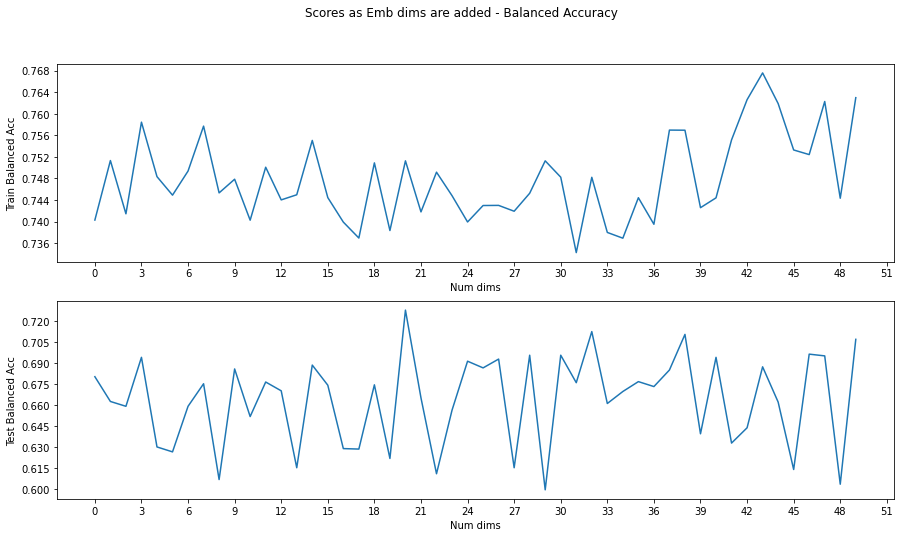

In [72]:
from matplotlib.ticker import MaxNLocator
fig, axs = plt.subplots(2, figsize=(15, 8))
fig.suptitle("Scores as Emb dims are added - Balanced Accuracy")
axs[0].set_xlabel("Num dims")
axs[0].get_xaxis().set_major_locator(MaxNLocator(integer=True, min_n_ticks=15))
axs[0].get_yaxis().set_major_locator(MaxNLocator(min_n_ticks=2))
axs[0].set_ylabel("Train Balanced Acc")
axs[1].set_xlabel("Num dims")
axs[1].get_xaxis().set_major_locator(MaxNLocator(integer=True, min_n_ticks=15))
axs[1].get_yaxis().set_major_locator(MaxNLocator(min_n_ticks=2))
axs[1].set_ylabel("Test Balanced Acc")

axs[0].plot(range(0, num_rounds), train_raw_emb_scores["balanced_accuracy"])
axs[1].plot(range(0, num_rounds), test_raw_emb_scores["balanced_accuracy"])

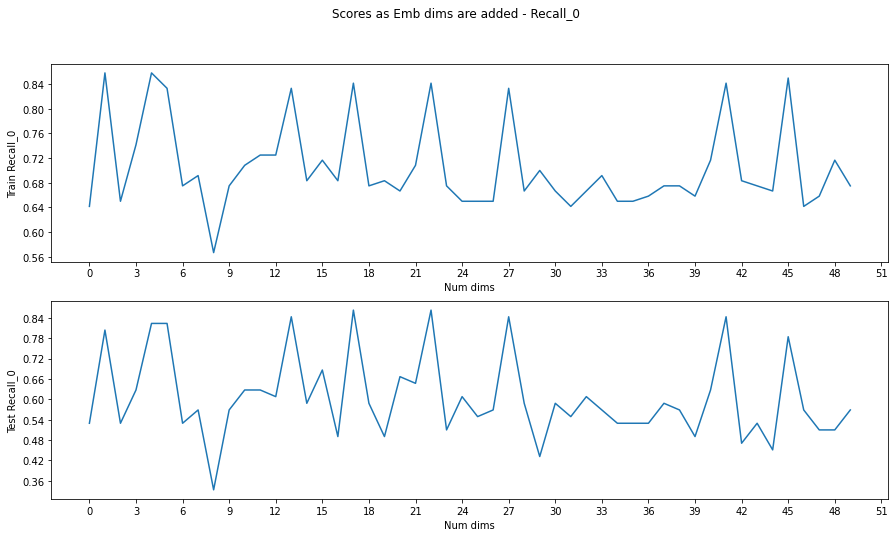

In [73]:
from matplotlib.ticker import MaxNLocator
fig, axs = plt.subplots(2, figsize=(15, 8))
fig.suptitle("Scores as Emb dims are added - Recall_0")
axs[0].set_xlabel("Num dims")
axs[0].get_xaxis().set_major_locator(MaxNLocator(integer=True, min_n_ticks=15))
axs[0].get_yaxis().set_major_locator(MaxNLocator(min_n_ticks=2))
axs[0].set_ylabel("Train Recall_0")
axs[1].set_xlabel("Num dims")
axs[1].get_xaxis().set_major_locator(MaxNLocator(integer=True, min_n_ticks=15))
axs[1].get_yaxis().set_major_locator(MaxNLocator(min_n_ticks=2))
axs[1].set_ylabel("Test Recall_0")

axs[0].plot(range(0, num_rounds), train_raw_emb_scores["recall_0"])
axs[1].plot(range(0, num_rounds), test_raw_emb_scores["recall_0"])

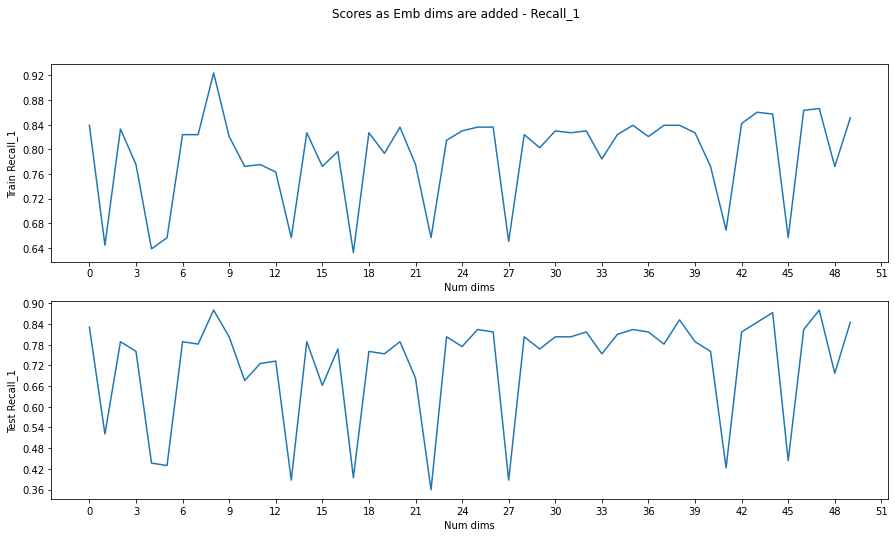

In [74]:
from matplotlib.ticker import MaxNLocator
fig, axs = plt.subplots(2, figsize=(15, 8))
fig.suptitle("Scores as Emb dims are added - Recall_1")
axs[0].set_xlabel("Num dims")
axs[0].get_xaxis().set_major_locator(MaxNLocator(integer=True, min_n_ticks=15))
axs[0].get_yaxis().set_major_locator(MaxNLocator(min_n_ticks=2))
axs[0].set_ylabel("Train Recall_1")
axs[1].set_xlabel("Num dims")
axs[1].get_xaxis().set_major_locator(MaxNLocator(integer=True, min_n_ticks=15))
axs[1].get_yaxis().set_major_locator(MaxNLocator(min_n_ticks=2))
axs[1].set_ylabel("Test Recall_1")

axs[0].plot(range(0, num_rounds), train_raw_emb_scores["recall_1"])
axs[1].plot(range(0, num_rounds), test_raw_emb_scores["recall_1"])

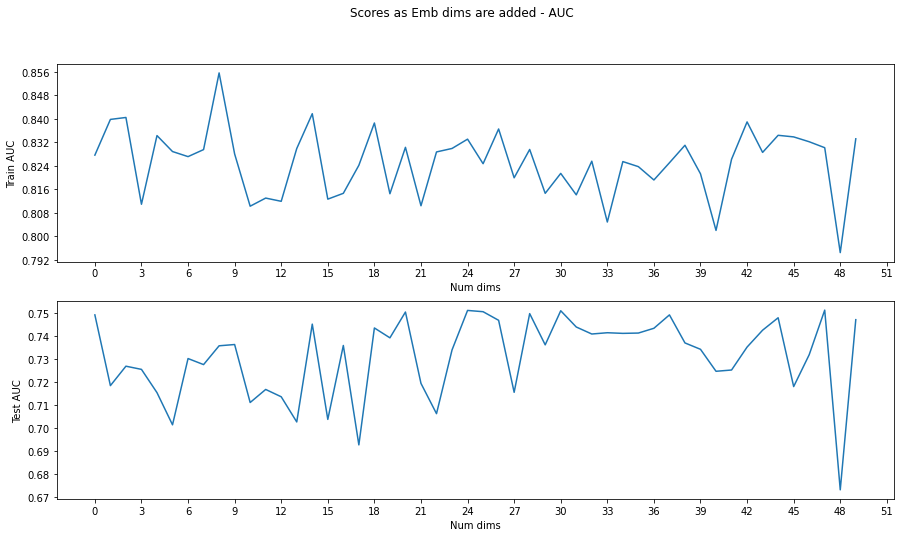

In [75]:
from matplotlib.ticker import MaxNLocator
fig, axs = plt.subplots(2, figsize=(15, 8))
fig.suptitle("Scores as Emb dims are added - AUC")
axs[0].set_xlabel("Num dims")
axs[0].get_xaxis().set_major_locator(MaxNLocator(integer=True, min_n_ticks=15))
axs[0].get_yaxis().set_major_locator(MaxNLocator(min_n_ticks=2))
axs[0].set_ylabel("Train AUC")
axs[1].set_xlabel("Num dims")
axs[1].get_xaxis().set_major_locator(MaxNLocator(integer=True, min_n_ticks=15))
axs[1].get_yaxis().set_major_locator(MaxNLocator(min_n_ticks=2))
axs[1].set_ylabel("Test AUC")

axs[0].plot(range(0, num_rounds), train_raw_emb_scores["auc"])
axs[1].plot(range(0, num_rounds), test_raw_emb_scores["auc"])

In [84]:
num_rounds = 50
params_raw_pln, train_raw_emb_pln_scores, test_raw_emb_pln_scores = embedding_effect(X_train_q[feats_100], X_train_emb_pln_df, X_test_q[feats_100], X_test_emb_pln_df, y_train, y_test, num_rounds)

Adding first 0 dims from embedding: 
Fitting 5 folds for each of 25 candidates, totalling 125 fits
[14:47:44] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:47:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 2.43 seconds.
Best Score: 74.027%
{'subsample': 0.6, 'scale_pos_weight': 0.3, 'n_estimators': 120, 'min_child_weight': 2, 'max_depth': 4, 'max_delta_step': 4, 'learning_rate': 0.02, 'gamma': 1.5, 'colsample_bytree': 0.6}
[14:47:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 125 | elapsed:    1.7s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 125 | elapsed:    1.8s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]

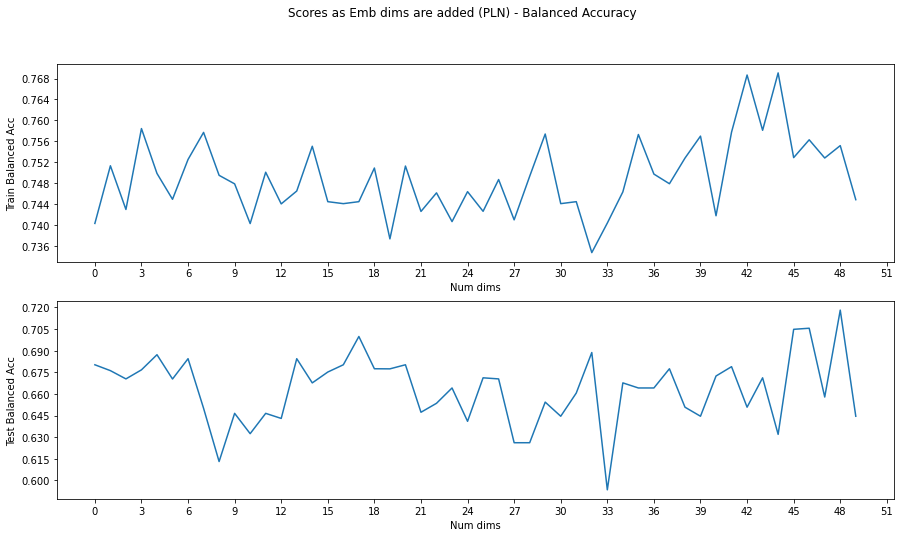

In [85]:
from matplotlib.ticker import MaxNLocator
fig, axs = plt.subplots(2, figsize=(15, 8))
fig.suptitle("Scores as Emb dims are added (PLN) - Balanced Accuracy")
axs[0].set_xlabel("Num dims")
axs[0].get_xaxis().set_major_locator(MaxNLocator(integer=True, min_n_ticks=15))
axs[0].get_yaxis().set_major_locator(MaxNLocator(min_n_ticks=2))
axs[0].set_ylabel("Train Balanced Acc")
axs[1].set_xlabel("Num dims")
axs[1].get_xaxis().set_major_locator(MaxNLocator(integer=True, min_n_ticks=15))
axs[1].get_yaxis().set_major_locator(MaxNLocator(min_n_ticks=2))
axs[1].set_ylabel("Test Balanced Acc")

axs[0].plot(range(0, num_rounds), train_raw_emb_pln_scores["balanced_accuracy"])
axs[1].plot(range(0, num_rounds), test_raw_emb_pln_scores["balanced_accuracy"])

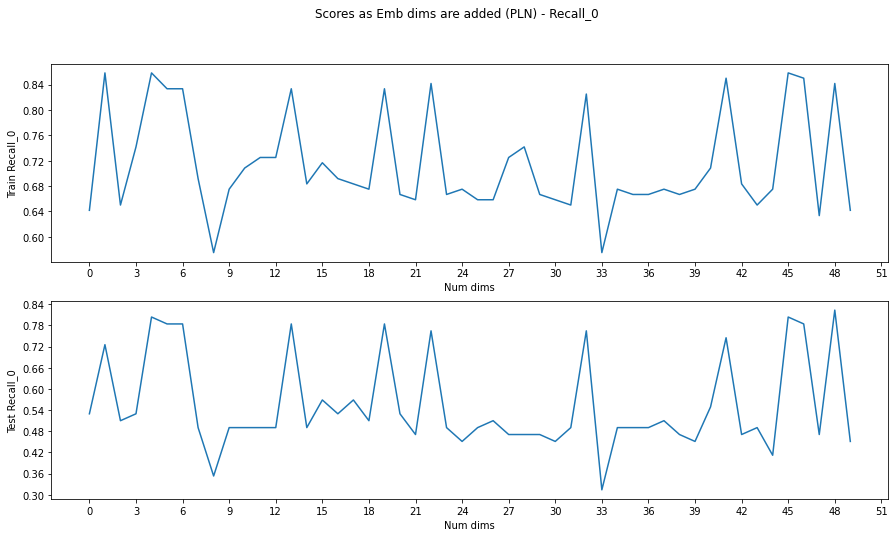

In [86]:
from matplotlib.ticker import MaxNLocator
fig, axs = plt.subplots(2, figsize=(15, 8))
fig.suptitle("Scores as Emb dims are added (PLN) - Recall_0")
axs[0].set_xlabel("Num dims")
axs[0].get_xaxis().set_major_locator(MaxNLocator(integer=True, min_n_ticks=15))
axs[0].get_yaxis().set_major_locator(MaxNLocator(min_n_ticks=2))
axs[0].set_ylabel("Train Recall_0")
axs[1].set_xlabel("Num dims")
axs[1].get_xaxis().set_major_locator(MaxNLocator(integer=True, min_n_ticks=15))
axs[1].get_yaxis().set_major_locator(MaxNLocator(min_n_ticks=2))
axs[1].set_ylabel("Test Recall_0")

axs[0].plot(range(0, num_rounds), train_raw_emb_pln_scores["recall_0"])
axs[1].plot(range(0, num_rounds), test_raw_emb_pln_scores["recall_0"])

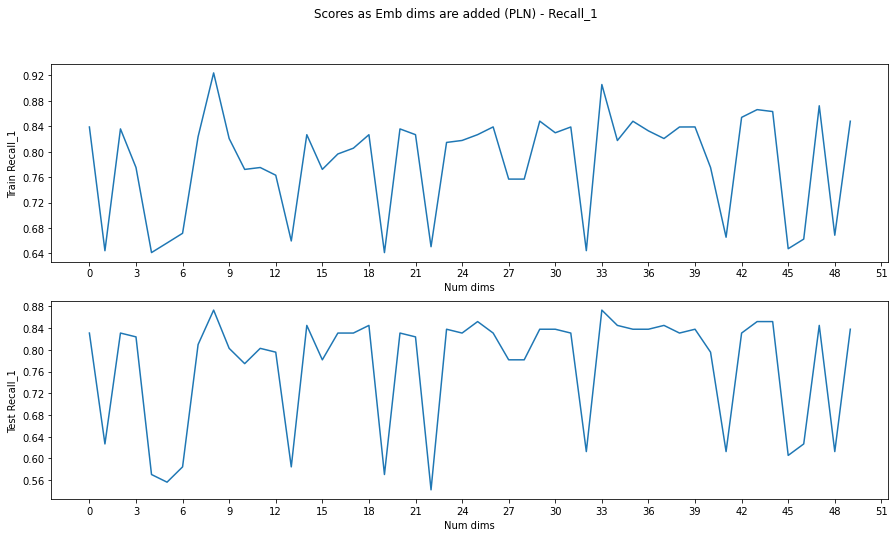

In [87]:
from matplotlib.ticker import MaxNLocator
fig, axs = plt.subplots(2, figsize=(15, 8))
fig.suptitle("Scores as Emb dims are added (PLN) - Recall_1")
axs[0].set_xlabel("Num dims")
axs[0].get_xaxis().set_major_locator(MaxNLocator(integer=True, min_n_ticks=15))
axs[0].get_yaxis().set_major_locator(MaxNLocator(min_n_ticks=2))
axs[0].set_ylabel("Train Recall_1")
axs[1].set_xlabel("Num dims")
axs[1].get_xaxis().set_major_locator(MaxNLocator(integer=True, min_n_ticks=15))
axs[1].get_yaxis().set_major_locator(MaxNLocator(min_n_ticks=2))
axs[1].set_ylabel("Test Recall_1")

axs[0].plot(range(0, num_rounds), train_raw_emb_pln_scores["recall_1"])
axs[1].plot(range(0, num_rounds), test_raw_emb_pln_scores["recall_1"])

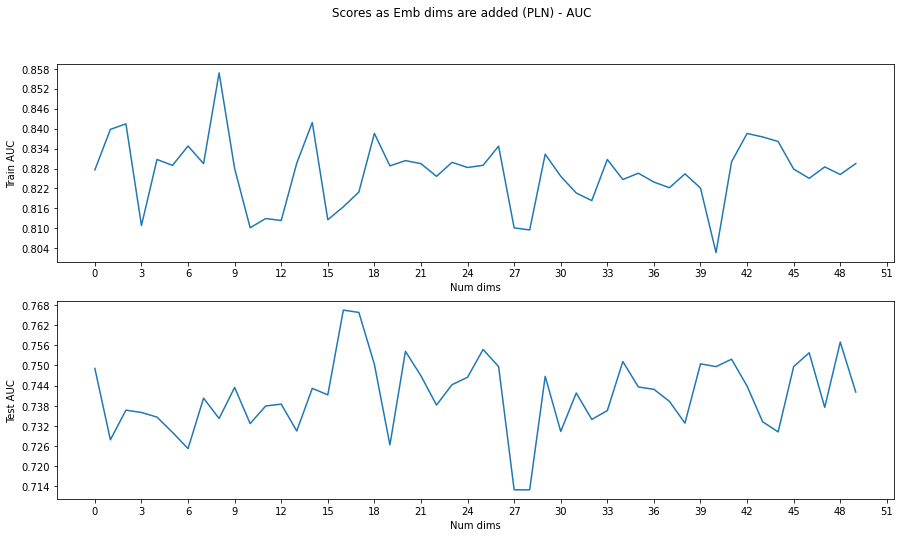

In [88]:
#PLN features
from matplotlib.ticker import MaxNLocator
fig, axs = plt.subplots(2, figsize=(15, 8))
fig.suptitle("Scores as Emb dims are added (PLN) - AUC")
axs[0].set_xlabel("Num dims")
axs[0].get_xaxis().set_major_locator(MaxNLocator(integer=True, min_n_ticks=15))
axs[0].get_yaxis().set_major_locator(MaxNLocator(min_n_ticks=2))
axs[0].set_ylabel("Train AUC")
axs[1].set_xlabel("Num dims")
axs[1].get_xaxis().set_major_locator(MaxNLocator(integer=True, min_n_ticks=15))
axs[1].get_yaxis().set_major_locator(MaxNLocator(min_n_ticks=2))
axs[1].set_ylabel("Test AUC")

axs[0].plot(range(0, num_rounds), train_raw_emb_pln_scores["auc"])
axs[1].plot(range(0, num_rounds), test_raw_emb_pln_scores["auc"])

In [93]:
X_train_pln_48_df = X_train_emb_pln_df.iloc[:,:48]
X_test_pln_48_df = X_test_emb_pln_df.iloc[:, :48]
X_train_raw_pln_48_df = pd.merge(X_train_q[feats_100], X_train_pln_48_df, left_index=True, right_index=True)
X_test_raw_pln_48_df = pd.merge(X_test_q[feats_100], X_test_pln_48_df, left_index=True, right_index=True)
X_train_raw_pln_48_df

,CADPS_underexpr,SLC44A1_underexpr,CX3CR1_underexpr,EDC3_overexpr,ZNF192_overexpr,MB_overexpr,TSTA3_underexpr,GRB7_overexpr,ITIH1_underexpr,ATP6V1G1_overexpr,...,38,39,40,41,42,43,44,45,46,47
22473,0.827627,0.874791,0.859864,0.678507,0.000000,0.797344,0.804367,0.755115,0.000000,0.000000,...,-0.022565,0.064456,-0.005669,-0.139841,-0.077309,-0.087933,0.000761,0.031036,-0.056484,0.072569
249608,0.886923,0.820469,0.000000,0.000000,0.768724,0.000000,0.775859,0.762136,0.000000,0.000000,...,0.025781,0.019716,0.044175,-0.074425,-0.008108,-0.129428,-0.014719,0.056092,0.003303,-0.012444
249599,0.824965,0.811832,0.000000,0.838330,0.762909,0.726660,0.000000,0.763000,0.000000,0.686340,...,-0.016654,0.054002,-0.082953,-0.019039,-0.021043,-0.070761,-0.031074,-0.043538,-0.019942,0.102781
441791,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.597218,...,-0.088454,0.090860,0.136791,-0.009954,-0.044662,0.114816,0.032145,0.021178,0.195625,0.032315
249560,0.775610,0.000000,0.637212,0.000000,0.646652,0.551731,0.532620,0.876357,0.810596,0.000000,...,-0.013251,0.040719,0.007821,-0.108907,0.008406,-0.054810,0.016198,0.033911,0.011404,-0.011191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22502,0.783680,0.000000,0.626520,0.670871,0.758194,0.757247,0.695567,0.000000,0.000000,0.000000,...,0.132778,-0.055214,0.092806,0.081961,-0.069325,0.009946,0.003085,-0.010021,-0.068580,-0.077124
441685,0.000000,0.000000,0.715496,0.773750,0.750000,0.000000,0.554802,0.757090,0.000000,0.867320,...,-0.089764,0.010045,0.046410,-0.010734,0.029847,-0.005100,0.080537,-0.020482,-0.023008,-0.041210
441899,0.000000,0.000000,0.796838,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.687171,...,-0.075466,0.160436,-0.011380,0.066300,0.041502,0.127171,0.021641,-0.059549,0.004025,-0.055876
305219,0.750000,0.599568,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000,...,0.074731,-0.008942,0.093272,-0.042821,-0.020865,0.057719,-0.075820,0.091868,-0.012140,-0.060404


In [94]:
params_raw_emb_pln_48, clf_raw_emb_pln_48, cv_scores_raw_emb_pln_48_acc, test_scores_raw_emb_pln_48_acc = evaluate_ge((X_train_raw_pln_48_df, X_test_raw_pln_48_df, y_train, y_test), split=False, rand_scoring="balanced_accuracy")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[15:40:29] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:40:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 4.55 seconds.
Best Score: 75.517%
{'subsample': 0.6, 'scale_pos_weight': 0.1, 'n_estimators': 120, 'min_child_weight': 1, 'max_depth': 5, 'max_delta_step': 3, 'learning_rate': 0.07, 'gamma': 1, 'colsample_bytree': 0.8}
[15:41:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 125 | elapsed:    3.1s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    4.0s finished


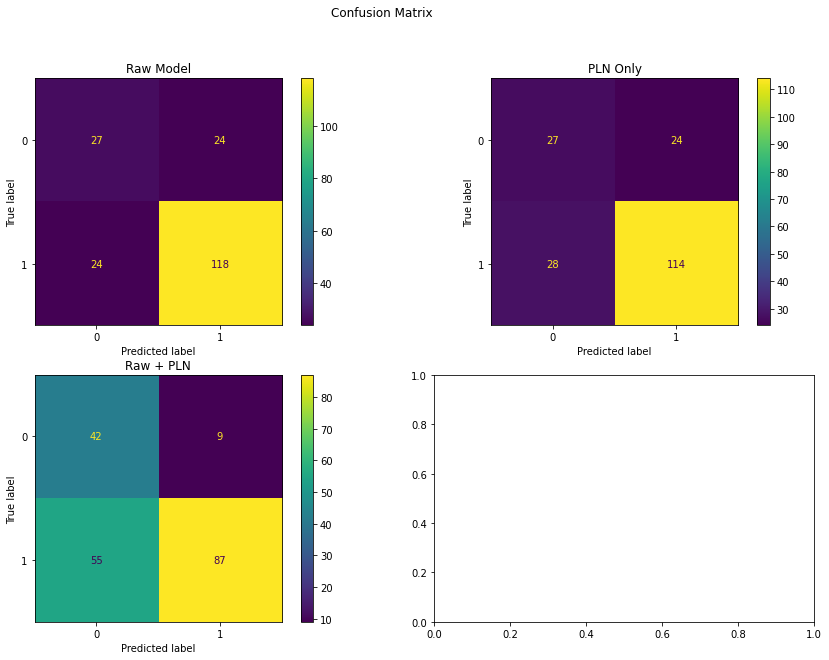

In [97]:
figs_1, axs_1 = plt.subplots(2, 2, figsize=(15, 10))
figs_1.suptitle("Confusion Matrix")
axs_1[0, 0].set_title("Raw Model")
axs_1[0, 1].set_title("PLN Only")
axs_1[1, 0].set_title("Raw + PLN")
plot_confusion_matrix(clf_q_acc, X_test_q[feats_100], y_test, ax=axs_1[0, 0])
plot_confusion_matrix(clf_emb_pln_acc, X_test_emb_pln_df, y_test, ax=axs_1[0, 1])
plot_confusion_matrix(clf_raw_emb_pln_48, X_test_raw_pln_48_df, y_test, ax=axs_1[1, 0])

In [98]:
print_score_comparison_v2(cv_score_q_acc, cv_scores_raw_emb_pln_48_acc, test_scores_q_acc, test_scores_raw_emb_pln_48_acc,
                          header_1="Raw", header_2="Raw + PLN Emb (48 dim)", opt="Accuracy")

	Validation set - Accuracy

			Raw				Raw + PLN Emb (48 dim)
		-------------------------------------------------------
balanced_accuracy:	74.03%				75.52%

recall_0:		64.17%				84.17%

precision_0:		59.12%				48.57%

recall_1:		83.89%				66.87%

precision_1:		86.65%				92.13%

auc:			82.76%				82.62%



	Test set - Accuracy

			Raw				Raw + PLN Emb (48 dim)
		-------------------------------------------------------
balanced_accuracy:	68.02%				71.81%

recall_0:		52.94%				82.35%

precision_0:		52.94%				43.30%

recall_1:		83.10%				61.27%

precision_1:		83.10%				90.62%

auc:			74.91%				75.70%

